In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Pré-Processando

In [2]:
caract = pd.read_csv('dataset-characterization.csv')
caract = caract.drop(columns=['depressive', 'Unnamed: 0'])
caract.head()

,text,repostCount,replyCount,likeCount,link,image,createdAt
0,you are worthy even if you:\n\nare battling de...,3,1,5,0,1,2024-10-12T21:52:30.121Z
1,Well dunno really \nJust saw them posting suic...,0,1,0,0,0,2023-09-03T03:07:41.109Z
2,There was a claim — maybe a rumor — that three...,60,41,1061,0,0,2024-11-08T19:21:39.224Z
3,#SuicidePrevention #Depression #Anxiety #Bully...,0,0,0,1,0,2022-03-16T13:10:05Z
4,ah shit damn guess i should have just been kil...,0,2,10,0,0,2024-09-06T22:19:19.694Z


In [3]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [4]:
import emoji

def remove_emojis(text):
    return emoji.replace_emoji(text, replace='') if isinstance(text, str) else text

caract['text'] = caract['text'].apply(remove_emojis)

In [5]:
dataset_final = pd.read_csv('dataset/dataset_final_3003.csv')
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        4898 non-null   object
 1   depressive  4898 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 76.7+ KB


In [6]:
df = caract.merge(dataset_final, on='text', how='right')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4568 entries, 0 to 4893
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         4568 non-null   object 
 1   repostCount  4568 non-null   float64
 2   replyCount   4568 non-null   float64
 3   likeCount    4568 non-null   float64
 4   link         4568 non-null   float64
 5   image        4568 non-null   float64
 6   createdAt    4568 non-null   object 
 7   depressive   4568 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 321.2+ KB


In [7]:
df['createdAt'] = df['createdAt'].astype('str')

def day_hour(row):
    if '.' in row:
        row = row.split('.', 1)[0]
    elif '+' in row:
        row = row.split('+', 1)[0]
    return pd.to_datetime(row) 

df['createdAt'] = df['createdAt'].apply(day_hour)

In [8]:
df.head()

,text,repostCount,replyCount,likeCount,link,image,createdAt,depressive
0,you are worthy even if you:\n\nare battling de...,3.0,1.0,5.0,0.0,1.0,2024-10-12 21:52:30,0
1,Well dunno really \nJust saw them posting suic...,0.0,1.0,0.0,0.0,0.0,2023-09-03 03:07:41,0
2,There was a claim — maybe a rumor — that three...,60.0,41.0,1061.0,0.0,0.0,2024-11-08 19:21:39,0
3,#SuicidePrevention #Depression #Anxiety #Bully...,0.0,0.0,0.0,1.0,0.0,2022-03-16 13:10:05+00:00,0
4,"Acceptance has been so key for me. At times, I...",0.0,0.0,0.0,0.0,0.0,2024-08-16 20:06:58,0


# Caracterização

/tmp/ipykernel_2253150/3756808834.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = df.groupby(['faixa', 'depressive']).size().unstack(fill_value=0)


<Figure size 1200x400 with 0 Axes>

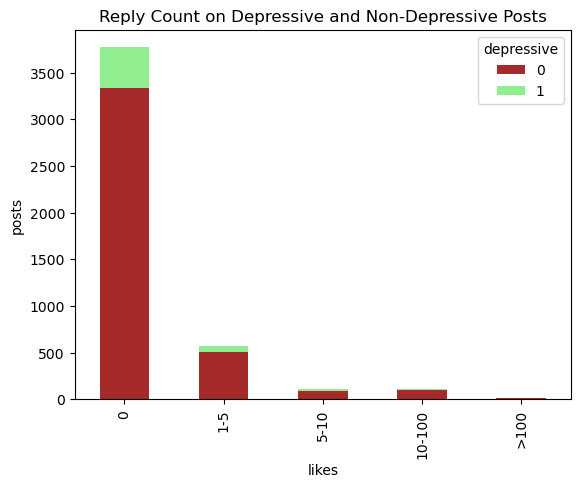

In [9]:
bins = [0, 1, 5, 10, 100, 4000]
labels = ['0', '1-5', '5-10', '10-100', '>100'] 
df['faixa'] = pd.cut(df['replyCount'], bins=bins, labels=labels, include_lowest=True)

contagem = df.groupby(['faixa', 'depressive']).size().unstack(fill_value=0)
plt.figure(figsize=(12,4))

contagem.plot(kind='bar', stacked=True, color=['brown', 'lightgreen'])

plt.title('Reply Count on Depressive and Non-Depressive Posts')
plt.ylabel('posts')
plt.xlabel('likes')
plt.show()

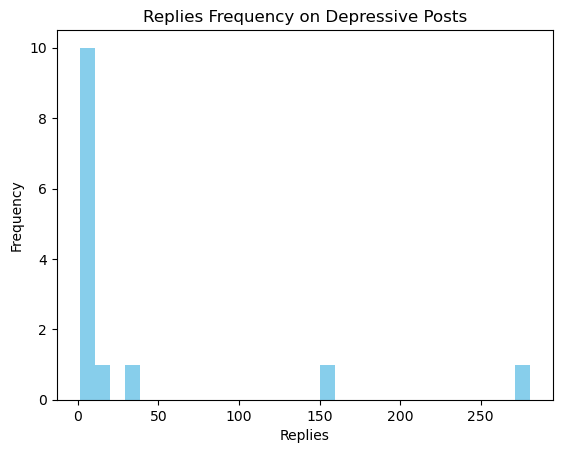

In [10]:
depressives = df.loc[df['depressive']==1]

depressives['replyCount'].value_counts().plot(kind='hist', bins=30, color='skyblue')
plt.title('Replies Frequency on Depressive Posts')
plt.xlabel('Replies')
plt.show()

/tmp/ipykernel_2253150/4161157850.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = df.groupby(['depressive', 'faixa']).size().unstack(fill_value=0)


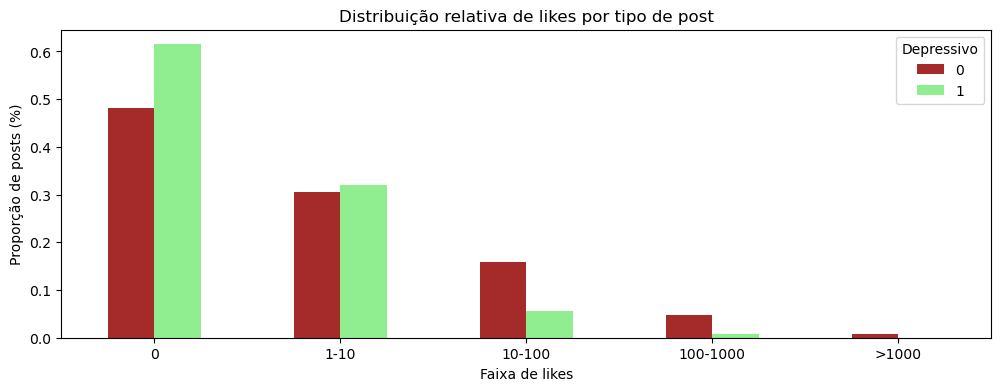

In [11]:
# Cria as faixas
bins = [0, 1, 10, 100, 1000, 10000]
labels = ['0', '1-10', '10-100', '100-1000', '>1000'] 
df['faixa'] = pd.cut(df['likeCount'], bins=bins, labels=labels, include_lowest=True)

# Conta posts por faixa e classe
contagem = df.groupby(['depressive', 'faixa']).size().unstack(fill_value=0)

# Normaliza: porcentagem por classe
proporcao = contagem.div(contagem.sum(axis=1), axis=0)

# Plot
proporcao.T.plot(kind='bar', figsize=(12,4), color=['brown', 'lightgreen'])
plt.title('Distribuição relativa de likes por tipo de post')
plt.ylabel('Proporção de posts (%)')
plt.xlabel('Faixa de likes')
plt.legend(title='Depressivo')
plt.xticks(rotation=0)
plt.show()


/tmp/ipykernel_1077556/3713996607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressives['createdAt'] = pd.to_datetime(depressives['createdAt'], utc=True).dt.tz_convert(None)
/tmp/ipykernel_1077556/3713996607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressives.loc[:, 'hour'] = depressives['createdAt'].dt.hour


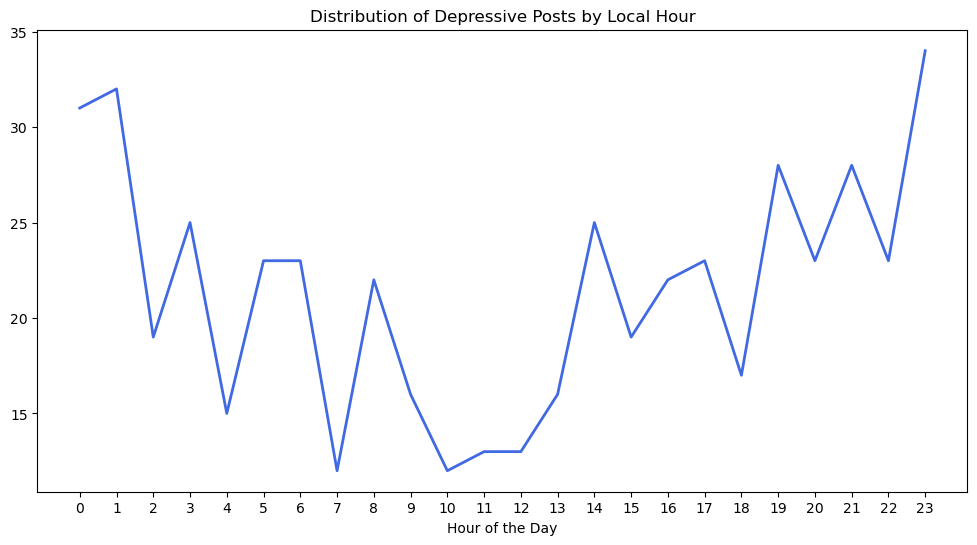

In [12]:
depressives['createdAt'] = pd.to_datetime(depressives['createdAt'], utc=True).dt.tz_convert(None)


depressives.loc[:, 'hour'] = depressives['createdAt'].dt.hour

plt.figure(figsize=(12,6))
hourly_counts = depressives['hour'].value_counts().sort_index()
plt.plot(hourly_counts.index, hourly_counts.values, linestyle='-', color='royalblue', lw=2)
plt.title('Distribution of Depressive Posts by Local Hour')
plt.xlabel('Hour of the Day')
plt.xticks(range(24))
plt.show()

In [13]:
%pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install image

Note: you may need to restart the kernel to use updated packages.


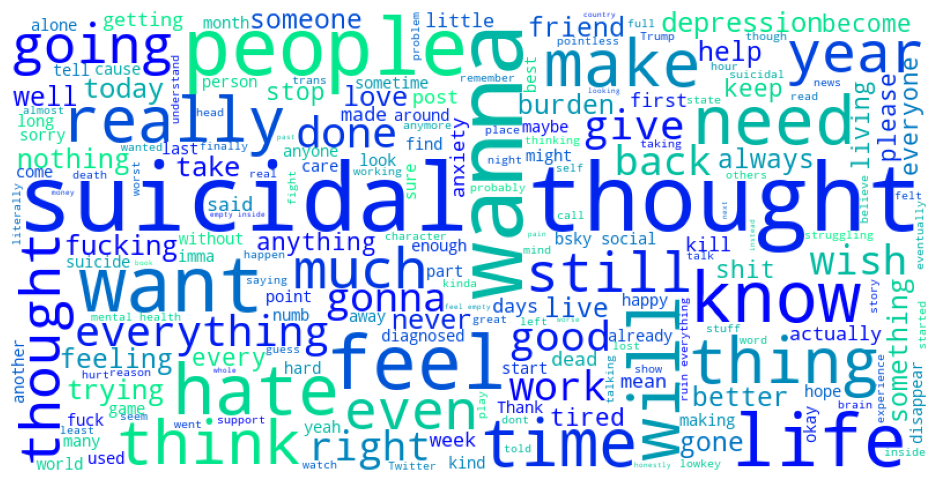

In [15]:
from wordcloud import WordCloud
from PIL import Image

mask = np.array(Image.open('cloud.png'))

text = ' '.join(df['text'])

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='winter', 
    min_word_length=4, 
    mask=mask, 
    contour_width=1, 
    contour_color='black'
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# XGBoost

In [16]:
df_baseline = df.copy()

df_baseline['createdAt'] = pd.to_datetime(df_baseline['createdAt'], utc=True).dt.tz_convert(None)

df_baseline.loc[:, 'hour'] = df_baseline['createdAt'].dt.hour
df_baseline.loc[:, 'month'] = df_baseline['createdAt'].dt.month

df_baseline = df_baseline.drop(columns=['text', 'faixa', 'createdAt'])


In [17]:
df_baseline.columns

Index(['repostCount', 'replyCount', 'likeCount', 'link', 'image', 'depressive',
       'hour', 'month'],
      dtype='object')

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

def RandomForest_Over(df):
    X = df.drop('depressive', axis=1)
    y = df['depressive']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    
    ros = RandomOverSampler(random_state=42)
    X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
    
    params_grid = {
        'bootstrap': [True, False],
        'max_depth': [20, 40, 60, 80],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [100, 200]
    }
    
    
    rf = RandomForestClassifier()
    grid_classifier = RandomizedSearchCV(
        estimator=rf, 
        param_distributions=params_grid, 
        n_iter=20,  # Reduzi para acelerar a busca
        cv=5, 
        random_state=42, 
        n_jobs=-1,
        scoring='f1'  # Definindo pontuação f1 para melhores resultados em dados desbalanceados
    )
    grid_classifier.fit(X_val, y_val)
    
    best_parameters = grid_classifier.best_params_
    model = RandomForestClassifier(**best_parameters)
    model.fit(X_train_res, y_train_res)
    
    pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, pred)
    ppv = precision_score(y_test, pred)
    sensit = recall_score(y_test, pred)
    specificity = confusion_matrix(y_test, pred)[0,0] / (confusion_matrix(y_test, pred)[0,0] + confusion_matrix(y_test, pred)[0,1])
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, pred)
    
    print(f"F1-Score: {f1:.4f}")
    print(f"Acurácia: {test_accuracy:.4f}")
    print(f"PPV (Precision): {ppv:.4f}")
    print(f"Sensibilidade (Recall): {sensit:.4f}")
    print(f"Especificidade: {specificity:.4f}")
    print(f"AUC: {auc_score:.4f}")
    print(classification_report(y_test, pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Depressão', 'Com Depressão'], yticklabels=['Sem Depressão', 'Com Depressão'])
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


In [25]:
# XGBoost com OverSampling
def XGBoost_Over(df):
    X = df.drop('depressive', axis=1)
    y = df['depressive']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    X_train = pd.concat([X_train, y_train], axis=1)
    
    not_depressive = X_train[X_train.depressive==0]
    depressive = X_train[X_train.depressive==1]
    
    depressive_upsampled = resample(depressive, replace=True, n_samples=len(not_depressive), random_state=42)
    
    upsampled = pd.concat([not_depressive, depressive_upsampled])
    
    y_train = upsampled.depressive
    X_train = upsampled.drop('depressive', axis=1)

    scale_pos_weight = sum(y == 0) / sum(y == 1)

    params_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 4, 5],
        'min_child_weight': [2, 3, 4],
        'subsample': [0.6, 0.8, 1],
        'colsample_bytree': [0.5, 0.7]
    }

    classifier = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_classifier = GridSearchCV(classifier, params_grid, scoring='accuracy', cv=cv)
    grid_classifier.fit(X_val, y_val)
    
    best_parameters = grid_classifier.best_params_

    model = xgb.XGBClassifier(**best_parameters)

    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    ppv = precision_score(y_test, pred)
    sensit = recall_score(y_test, pred)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])

    xgb_val_pred = model.predict_proba(X_val)[:, 1]  # shape: (n_samples,)
    xgb_test_pred = model.predict_proba(X_test)[:, 1]

    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, pred)
    print(f"F1-Score: {f1:.4f}")
    print(f"Acurácia: {test_accuracy:.4f}")
    print(f"PPV (Precision): {ppv:.4f}")
    print(f"Sensibilidade (Recall): {sensit:.4f}")
    print(f"Especificidade: {specificity:.4f}")
    print(f"AUC: {auc_score:.4f}")

    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Depressão', 'Com Depressão'], yticklabels=['Sem Depressão', 'Com Depressão'])
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()

    df_val = pd.DataFrame({
        "xgb_proba": xgb_val_pred,
        "true_label": y_val.reset_index(drop=True)  # para garantir alinhamento de índices
    })

    df_test = pd.DataFrame({
        "xgb_proba": xgb_test_pred,
        "true_label": y_test.reset_index(drop=True)
    })

    df_val.to_csv("xgb_features_val.csv", index=False)
    df_test.to_csv("xgb_features_test.csv", index=False)


F1-Score: 0.2532
Acurácia: 0.8063
PPV (Precision): 0.2344
Sensibilidade (Recall): 0.2752
Especificidade: 0.8783
AUC: 0.6051
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       805
           1       0.23      0.28      0.25       109

    accuracy                           0.81       914
   macro avg       0.57      0.58      0.57       914
weighted avg       0.82      0.81      0.81       914



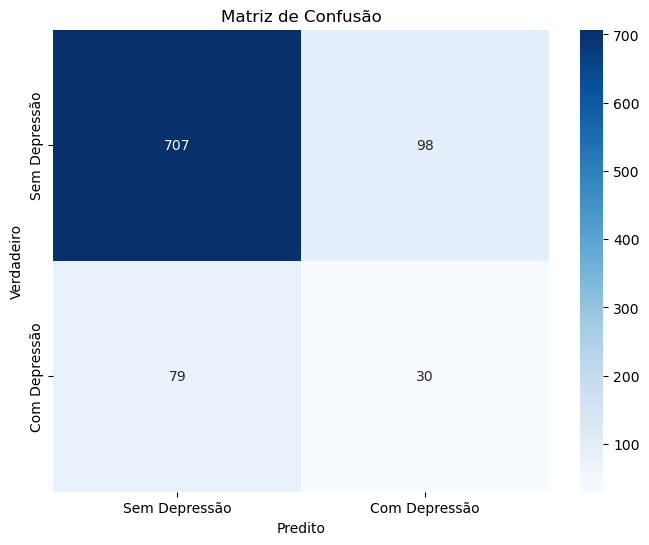

In [26]:
RandomForest_Over(df_baseline)

F1-Score: 0.2979
Acurácia: 0.7112
PPV (Precision): 0.2097
Sensibilidade (Recall): 0.5138
Especificidade: 0.7379
AUC: 0.6699
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       805
           1       0.21      0.51      0.30       109

    accuracy                           0.71       914
   macro avg       0.56      0.63      0.56       914
weighted avg       0.83      0.71      0.76       914

[[594 211]
 [ 53  56]]


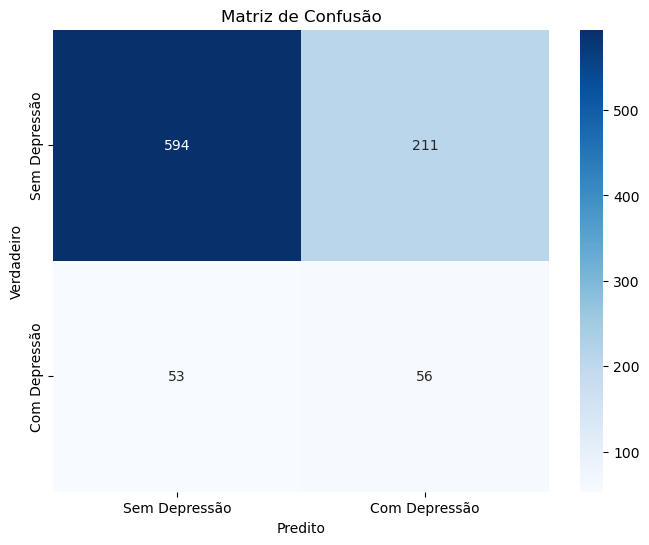

In [27]:
XGBoost_Over(df_baseline)